In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import dataframe_image as dfi

df_negara = pd.read_csv('Downloads/Data_Negara_HELP.csv')

df_negara.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [49]:
df_negara.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [3]:
# Persiapan data, menjadikan Negara sebagai index dan merubah type menjadi float semua
df_Negara = df_negara.set_index('Negara')
df = df_Negara.astype('float')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kematian_anak     167 non-null    float64
 1   Ekspor            167 non-null    float64
 2   Kesehatan         167 non-null    float64
 3   Impor             167 non-null    float64
 4   Pendapatan        167 non-null    float64
 5   Inflasi           167 non-null    float64
 6   Harapan_hidup     167 non-null    float64
 7   Jumlah_fertiliti  167 non-null    float64
 8   GDPperkapita      167 non-null    float64
dtypes: float64(9)
memory usage: 13.0+ KB


,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Negara,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
Venezuela,17.1,28.5,4.91,17.6,16500.0,45.90,75.4,2.47,13500.0
Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0


In [4]:
#Memastikan data tidak ada yang kosong dan duplikat
print(df.isna().sum())
print('Jumlah data duplikat :', df.duplicated().sum())

Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64
Jumlah data duplikat : 0


                  Kematian_anak    Ekspor  Kesehatan     Impor  Pendapatan  \
Kematian_anak          1.000000 -0.318093  -0.200402 -0.127211   -0.524315   
Ekspor                -0.318093  1.000000  -0.114408  0.737381    0.516784   
Kesehatan             -0.200402 -0.114408   1.000000  0.095717    0.129579   
Impor                 -0.127211  0.737381   0.095717  1.000000    0.122406   
Pendapatan            -0.524315  0.516784   0.129579  0.122406    1.000000   
Inflasi                0.288276 -0.107294  -0.255376 -0.246994   -0.147756   
Harapan_hidup         -0.886676  0.316313   0.210692  0.054391    0.611962   
Jumlah_fertiliti       0.848478 -0.320011  -0.196674 -0.159048   -0.501840   
GDPperkapita          -0.483032  0.418725   0.345966  0.115498    0.895571   

                   Inflasi  Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
Kematian_anak     0.288276      -0.886676          0.848478     -0.483032  
Ekspor           -0.107294       0.316313         -0.320011      0.

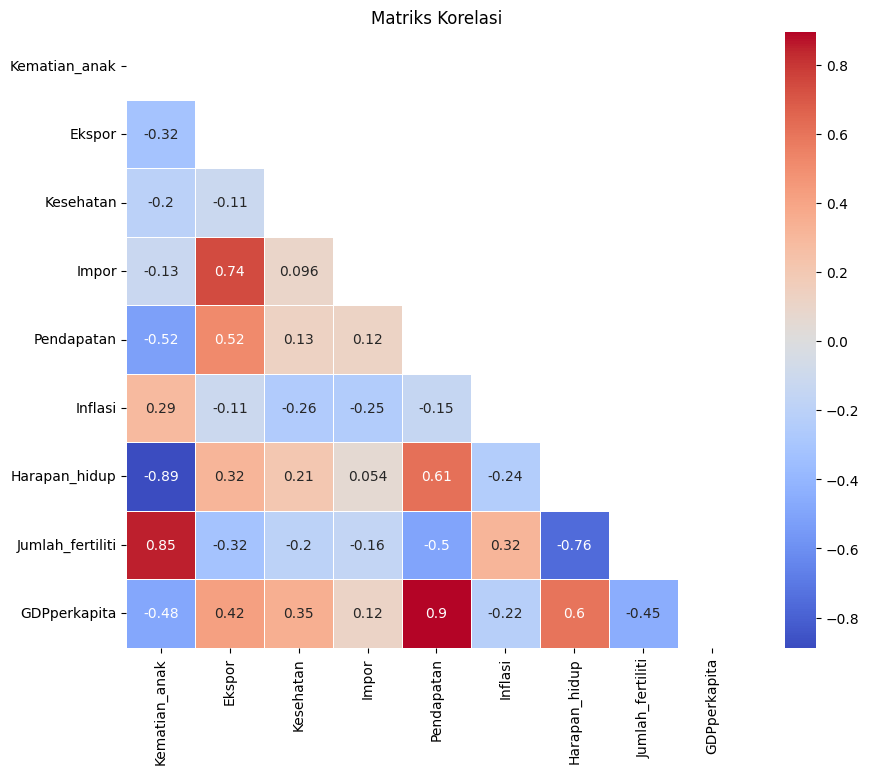

In [6]:
#Mencari Korelasi antar data
korelasi = df.corr()
print(korelasi)
plt.figure(figsize=(10, 8))
mask = np.triu(korelasi)
sns.heatmap(korelasi, annot=True, cmap='coolwarm', linewidths=.5, mask=mask)
plt.title('Matriks Korelasi')
plt.savefig('MatrixKolerasi.png')
plt.show()

<Axes: xlabel='Pendapatan'>

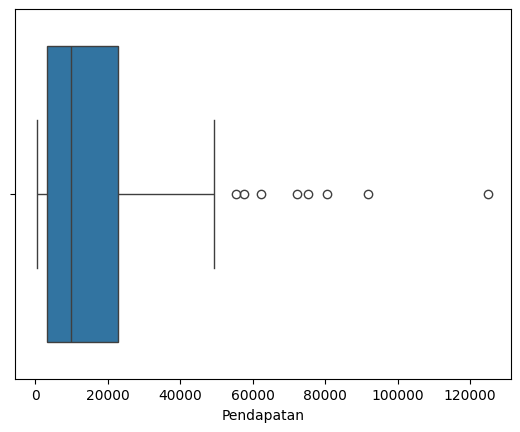

In [7]:
#Dari korelasi diatas dapat diambil dua data yang beruhubungan dengan ekonomi yaitu pendapatan dan kesehatan yaitu Harapan_hidup dengan nilai korelasi 0,61
sns.boxplot(x='Pendapatan', data=df)

<Axes: xlabel='Harapan_hidup'>

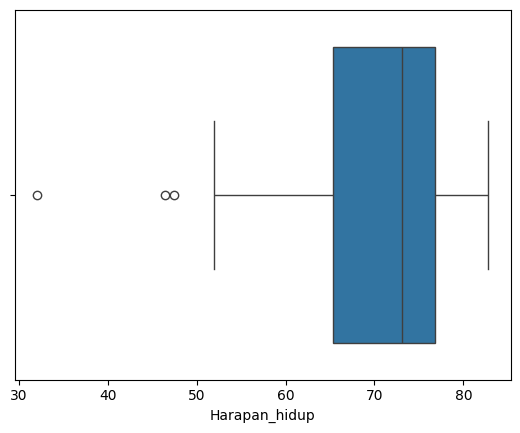

In [55]:
sns.boxplot(x='Harapan_hidup', data=df)

In [8]:
#Mengatur handling outlier dengan winsorize
from scipy.stats.mstats import winsorize

df2 =pd.DataFrame(data = df, columns = ['Negara','Pendapatan', 'Harapan_hidup']) 

df2['Pendapatan'] = winsorize(df2['Pendapatan'], limits =[0.05, 0.05])  
df2['Harapan_hidup'] = winsorize(df2['Harapan_hidup'], limits = [0.05, 0.05]) 

#df_negara = df2.set_index('Negara')
#df2 = df_negara.astype('float')
#df2.info()
df2

,Negara,Pendapatan,Harapan_hidup
Negara,,,
Afghanistan,NaN,1610.0,56.2
Albania,NaN,9930.0,76.3
Algeria,NaN,12900.0,76.5
Angola,NaN,5900.0,60.1
Antigua and Barbuda,NaN,19100.0,76.8
...,...,...,...
Vanuatu,NaN,2950.0,63.0
Venezuela,NaN,16500.0,75.4
Vietnam,NaN,4490.0,73.1


Negara           167
Pendapatan         0
Harapan_hidup      0
dtype: int64


<Axes: xlabel='Pendapatan'>

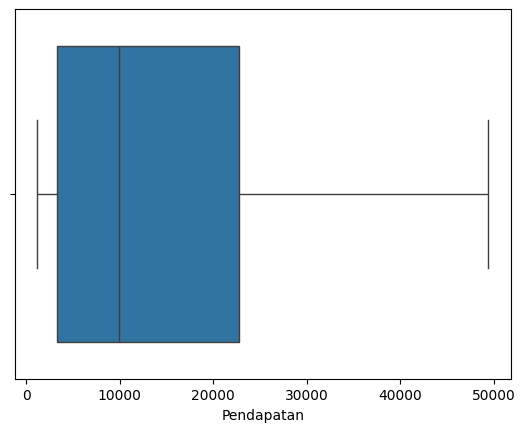

In [9]:
print(df2.isna().sum())
sns.boxplot(x='Pendapatan', data=df2)

<Axes: xlabel='Harapan_hidup'>

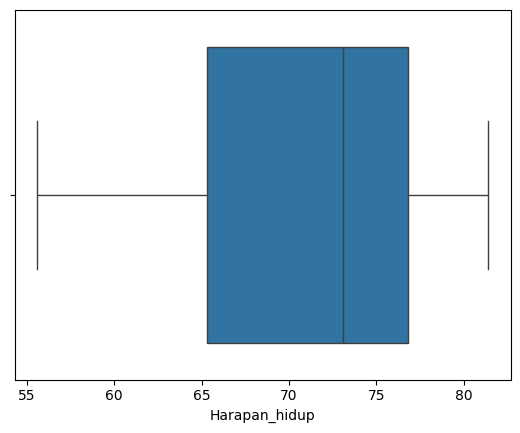

In [72]:
sns.boxplot(x='Harapan_hidup', data=df2)

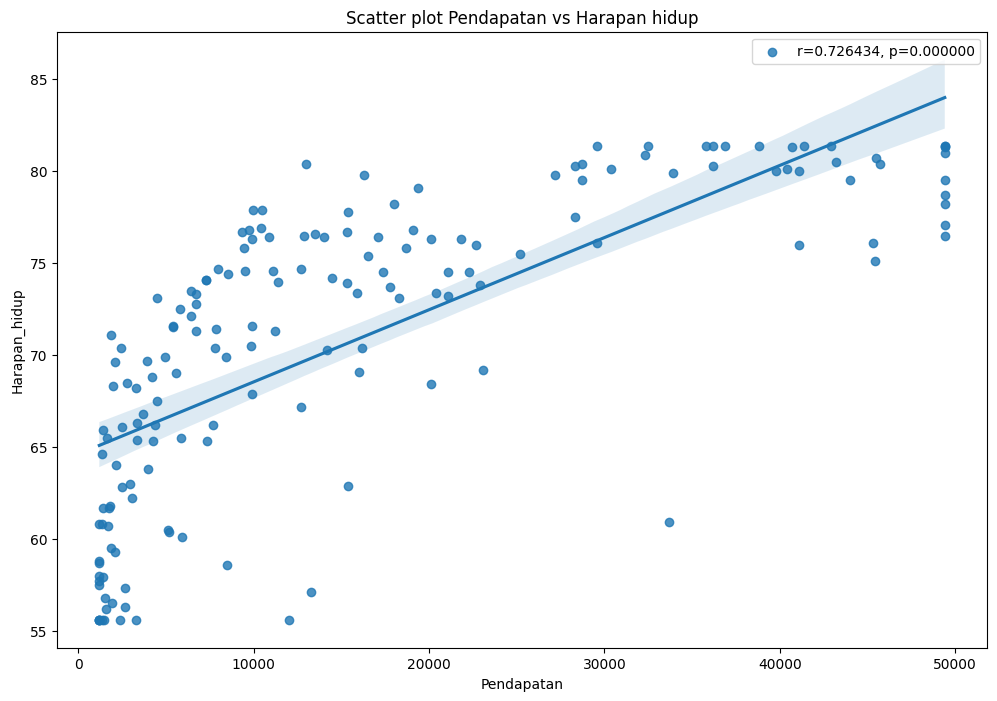

In [10]:
#Hasil uji pearsonr menunjukkan nilai sebesar 0.726, nilai ini dapat diartikan bahwa variabel pendapatan dan harapan hidup suatu negara memiliki korelasi yang kuat. 
#Korelasi yang kuat menandakan bahwa jika Pendapatan meningkat, angka harapan hidup juga meningkat, begitu juga sebaliknya.
from scipy import stats

fig, ax = plt.subplots(figsize = (12,8))

sns.regplot(data = df2, x = 'Pendapatan', y ='Harapan_hidup' )
#menghitung nilai regresi 
r, p = stats.pearsonr(df2['Pendapatan'], df2['Harapan_hidup'])

plt.title('Scatter plot Pendapatan vs Harapan hidup')
plt.legend(['r={:f}, p={:f}'.format(r,p)])
plt.show()

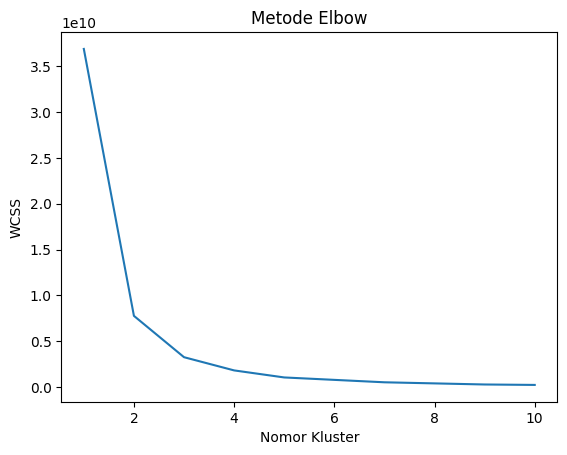

In [11]:
df_negara = df2.set_index('Negara')
df3 = df_negara.astype('float')

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
    kmeans.fit(df3)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Nomor Kluster')
plt.ylabel('WCSS')
plt.show()

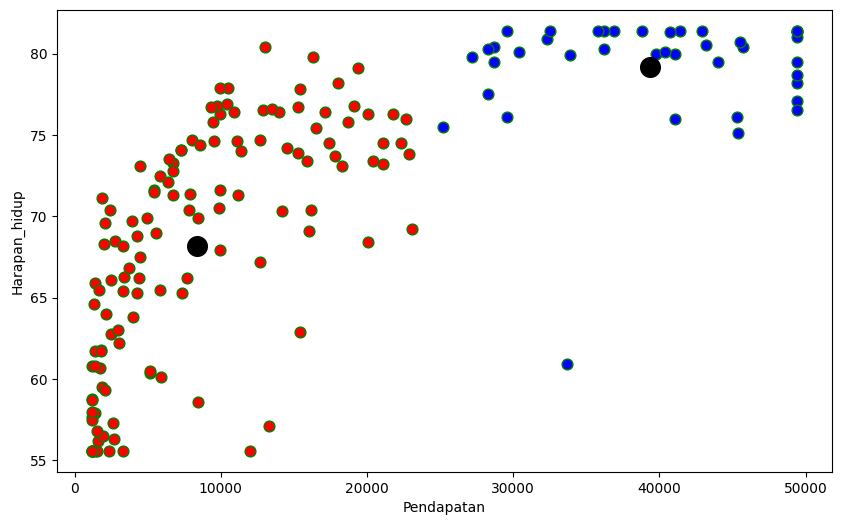

In [12]:
#Clustering data dengan K-Means
sc = StandardScaler()
#df_outlier = sc.fit_transform(df2.astype(float))

#Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan
kmeans1 = KMeans(n_clusters=2, random_state=42).fit(df3)
labels1 = kmeans1.labels_

new_df_outlier = pd.DataFrame(data = df3, columns = ['Pendapatan','Harapan_hidup'])
new_df_outlier['label_kmeans1'] = labels1

plt.figure(figsize=(10,6))
plt.scatter(new_df_outlier.Pendapatan[new_df_outlier.label_kmeans1 == 0], new_df_outlier['Harapan_hidup'][new_df_outlier.label_kmeans1 == 0], c='red', s=60,edgecolor='green', linestyle='-')
plt.scatter(new_df_outlier.Pendapatan[new_df_outlier.label_kmeans1 == 1], new_df_outlier['Harapan_hidup'][new_df_outlier.label_kmeans1 == 1], c='blue', s=60,edgecolor='green', linestyle='-')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:,0], centers[:, 1], c='black', s=200);
plt.xlabel('Pendapatan')
plt.ylabel('Harapan_hidup')
plt.show()

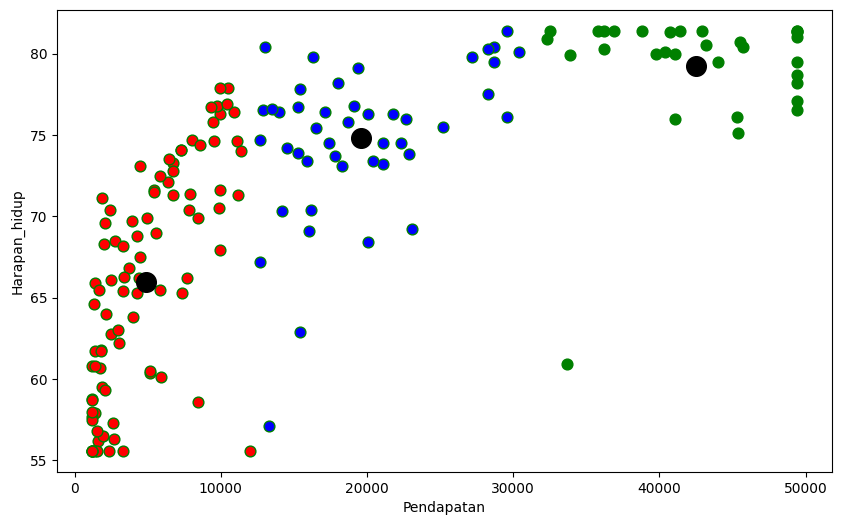

In [13]:
kmeans2 = KMeans(n_clusters=3, random_state=42).fit(df3)
labels2 = kmeans2.labels_

new_df_outlier = pd.DataFrame(data = df3, columns = ['Pendapatan','Harapan_hidup'])
new_df_outlier['label_kmeans2'] = labels2

plt.figure(figsize=(10,6))
plt.scatter(new_df_outlier.Pendapatan[new_df_outlier.label_kmeans2 == 0], new_df_outlier['Harapan_hidup'][new_df_outlier.label_kmeans2 == 0], c='red', s=60,edgecolor='green', linestyle='-')
plt.scatter(new_df_outlier.Pendapatan[new_df_outlier.label_kmeans2 == 1], new_df_outlier['Harapan_hidup'][new_df_outlier.label_kmeans2 == 1], c='green', s=60,edgecolor='green', linestyle='-')
plt.scatter(new_df_outlier.Pendapatan[new_df_outlier.label_kmeans2 == 2], new_df_outlier['Harapan_hidup'][new_df_outlier.label_kmeans2 == 2], c='blue', s=60,edgecolor='green', linestyle='-')

centers = kmeans2.cluster_centers_
plt.scatter(centers[:,0], centers[:, 1], c='black', s=200);
plt.xlabel('Pendapatan')
plt.ylabel('Harapan_hidup')
plt.show()

In [66]:
print(silhouette_score(new_df_outlier, labels=labels1))
print(silhouette_score(new_df_outlier, labels=labels2))

0.7185821346938258
0.6457388528878701


In [33]:
df2

,Pendapatan,Harapan_hidup
Negara,,
Afghanistan,1610.0,56.2
Albania,9930.0,76.3
Algeria,12900.0,76.5
Angola,5900.0,60.1
Antigua and Barbuda,19100.0,76.8
...,...,...
Vanuatu,2950.0,63.0
Venezuela,16500.0,75.4
Vietnam,4490.0,73.1


In [85]:
df.sort_values(by = ['Pendapatan', 'Harapan_hidup'], ascending = True)

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Negara,,,,,,,,,
"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609.0,20.800,57.5,6.54,334.0
Liberia,89.3,19.10,11.80,92.6,700.0,5.470,60.8,5.02,327.0
Burundi,93.6,8.92,11.60,39.2,764.0,12.300,57.7,6.26,231.0
Niger,123.0,22.20,5.16,49.1,814.0,2.550,58.8,7.49,348.0
Central African Republic,149.0,11.80,3.98,26.5,888.0,2.010,47.5,5.21,446.0
...,...,...,...,...,...,...,...,...,...
Singapore,2.8,200.00,3.96,174.0,72100.0,-0.046,82.7,1.15,46600.0
Kuwait,10.8,66.70,2.63,30.4,75200.0,11.200,78.2,2.21,38500.0
Brunei,10.5,67.40,2.84,28.0,80600.0,16.700,77.1,1.84,35300.0


In [29]:
df2.sort_values(by = ['Pendapatan', 'Harapan_hidup'], ascending = True)

,Pendapatan,Harapan_hidup
Negara,,
Central African Republic,1210.0,55.6
Malawi,1210.0,55.6
Mozambique,1210.0,55.6
"Congo, Dem. Rep.",1210.0,57.5
Burundi,1210.0,57.7
...,...,...
Qatar,49400.0,79.5
Norway,49400.0,81.0
Luxembourg,49400.0,81.3


In [19]:
new_df_outlier.groupby(['label_kmeans2']).agg({'Pendapatan':'mean','Harapan_hidup':'mean' })

,Pendapatan,Harapan_hidup
label_kmeans2,,
0,4870.659341,65.975824
1,42496.774194,79.245161
2,19566.666667,74.813333


In [32]:
#df2 = df2.drop('Negara', axis=1)
#df2

In [31]:
lower_cluster = new_df_outlier['label_kmeans2'] == 0

nation_lower_cluster = []
for i in df2.Negara[lower_cluster]:
    nation_lower_cluster.append(i)
print('Negara klasifikasi lower cluster')
print(nation_lower_cluster)

AttributeError: 'DataFrame' object has no attribute 'Negara'